<a href="https://colab.research.google.com/github/yanghai6/LightGNN/blob/Data-Exploration/CPSC583_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Downloads

In [11]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2023-10-16 20:50:38--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.1’

ml-latest-small.zip 100%[===================>] 955.28K   777KB/s    in 1.2s    

2023-10-16 20:50:41 (777 KB/s) - ‘ml-latest-small.zip.1’ saved [978202/978202]

Archive:  ml-latest-small.zip
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ml-latest-small/links.csv  
replace ml-latest-small/tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ml-latest-small/tags.csv  
replace ml-latest-small/ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ml-latest-small/ratings.csv  
replace ml-latest-small/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflat

In [ ]:
movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
tags_df = pd.read_csv('ml-latest-small/tags.csv')
links_df = pd.read_csv('ml-latest-small/links.csv')

In [16]:
amazon_url = "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Movies_and_TV.csv"
amazon_headings = ['item', 'user', 'rating', 'timestamp']
amazon_df = pd.read_csv(amazon_url, header=None, names=amazon_headings)

# Data Exploration

## MovieLens Dataset

In [5]:
# Calculating the average rating given by each user
user_avg_ratings = ratings_df.groupby('userId')['rating'].mean()

# sns.set_style("whitegrid")
# # Plotting the distribution of average ratings given by users
# plt.figure(figsize=(12,6))
# sns.histplot(user_avg_ratings, bins=30, kde=True, color='salmon')
# plt.title('Distribution of Average Ratings Given by Users')
# plt.xlabel('Average Rating')
# plt.ylabel('Number of Users')
# plt.show()

In [6]:
# Calculating the number of ratings given by each user
new_user_rating_counts = ratings_df.groupby('userId')['rating'].count()

# # Plotting the distribution of the number of ratings per user
# plt.figure(figsize=(12,6))
# sns.histplot(new_user_rating_counts, bins=50, kde=True, color='skyblue')
# plt.title('Distribution of Number of Ratings per User')
# plt.xlabel('Number of Ratings')
# plt.ylabel('Number of Users')
# plt.show()

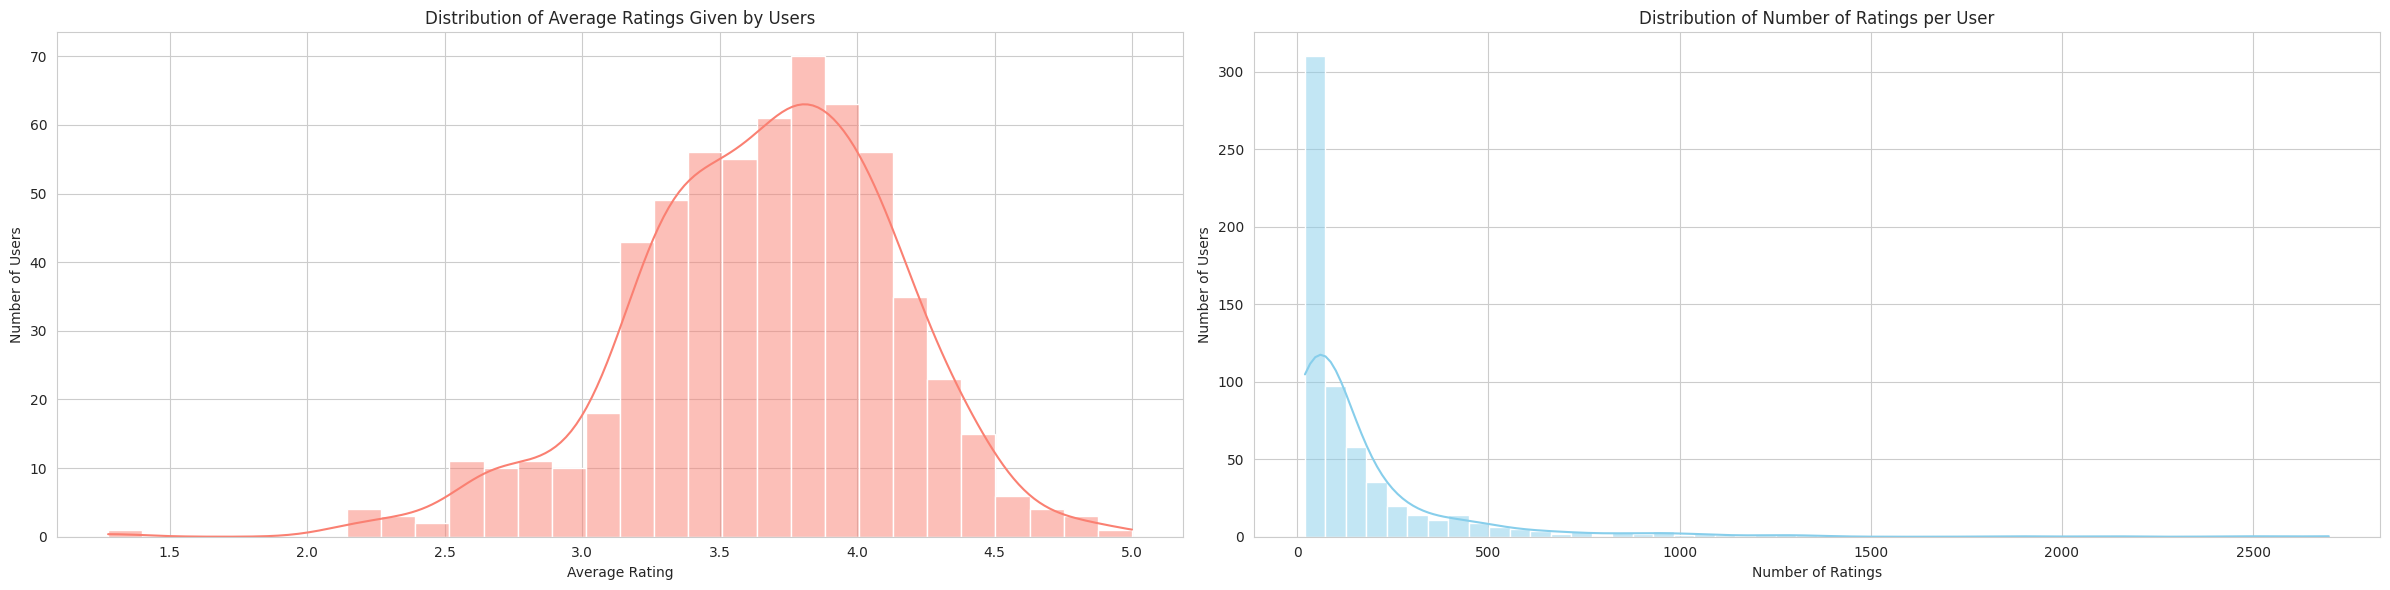

In [7]:
# Creating a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plotting the distribution of average ratings given by users on the left subplot
sns.histplot(user_avg_ratings, bins=30, kde=True, color='salmon', ax=axes[0])
axes[0].set_title('Distribution of Average Ratings Given by Users')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Number of Users')

# Plotting the distribution of the number of ratings per user on the right subplot
sns.histplot(new_user_rating_counts, bins=50, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of Number of Ratings per User')
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('Number of Users')

# Adjusting the layout to ensure no overlaps
plt.tight_layout()
plt.show()

In [8]:
# Calculating the average rating received by each movie
movie_avg_ratings = ratings_df.groupby('movieId')['rating'].mean()

# Plotting the distribution of average ratings received by movies
# plt.figure(figsize=(12,6))
# sns.histplot(movie_avg_ratings, bins=30, kde=True, color='teal')
# plt.title('Distribution of Average Ratings Received by Movies')
# plt.xlabel('Average Rating')
# plt.ylabel('Number of Movies')
# plt.show()

In [9]:
# Calculating the number of ratings received by each movie
new_movie_rating_counts = ratings_df.groupby('movieId')['rating'].count()

# Plotting the distribution of the number of ratings received by movies
# plt.figure(figsize=(12,6))
# sns.histplot(new_movie_rating_counts, bins=50, kde=True, color='salmon')
# plt.title('Distribution of Number of Ratings Received by Movies')
# plt.xlabel('Number of Ratings Received')
# plt.ylabel('Number of Movies')
# plt.show()

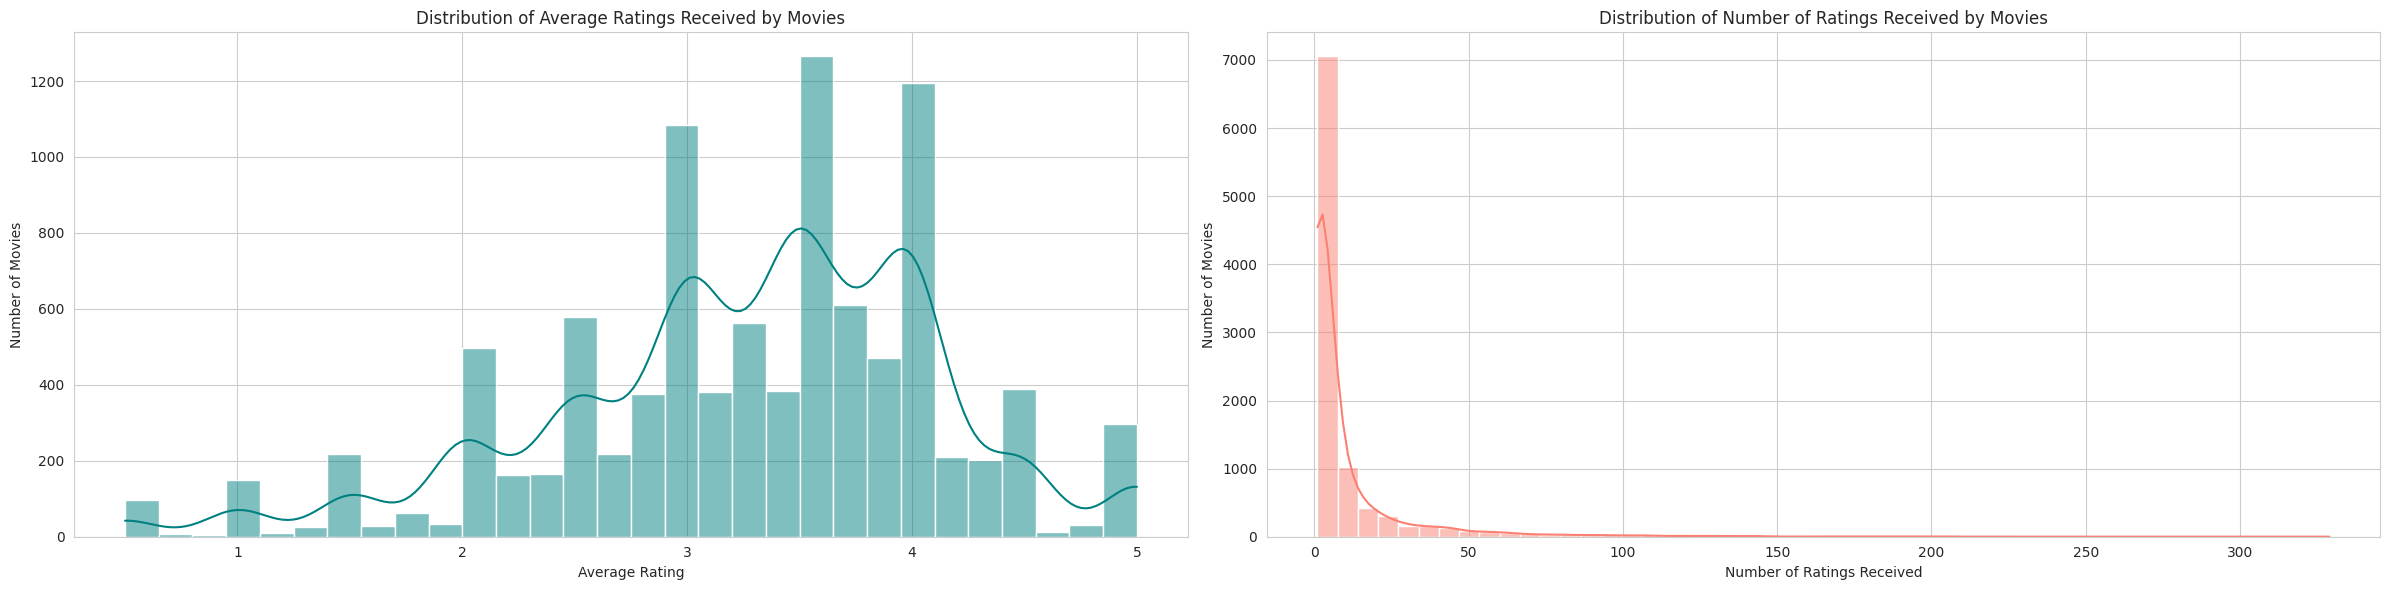

In [10]:
# Creating a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plotting the distribution of average ratings received by movies on the left subplot
sns.histplot(movie_avg_ratings, bins=30, kde=True, color='teal', ax=axes[0])
axes[0].set_title('Distribution of Average Ratings Received by Movies')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Number of Movies')

# Plotting the distribution of the number of ratings received by movies on the right subplot
sns.histplot(new_movie_rating_counts, bins=50, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of Number of Ratings Received by Movies')
axes[1].set_xlabel('Number of Ratings Received')
axes[1].set_ylabel('Number of Movies')

# Adjusting the layout to ensure no overlaps
plt.tight_layout()
plt.show()

In [10]:
# Total possible interactions (assuming every user rated every movie)
total_possible_interactions = len(ratings_df['userId'].unique()) * len(ratings_df['movieId'].unique())

# Actual interactions in the dataset
actual_interactions = len(ratings_df)

# Calculating the sparsity
sparsity = (1 - (actual_interactions / total_possible_interactions)) * 100
sparsity

98.30003169443864

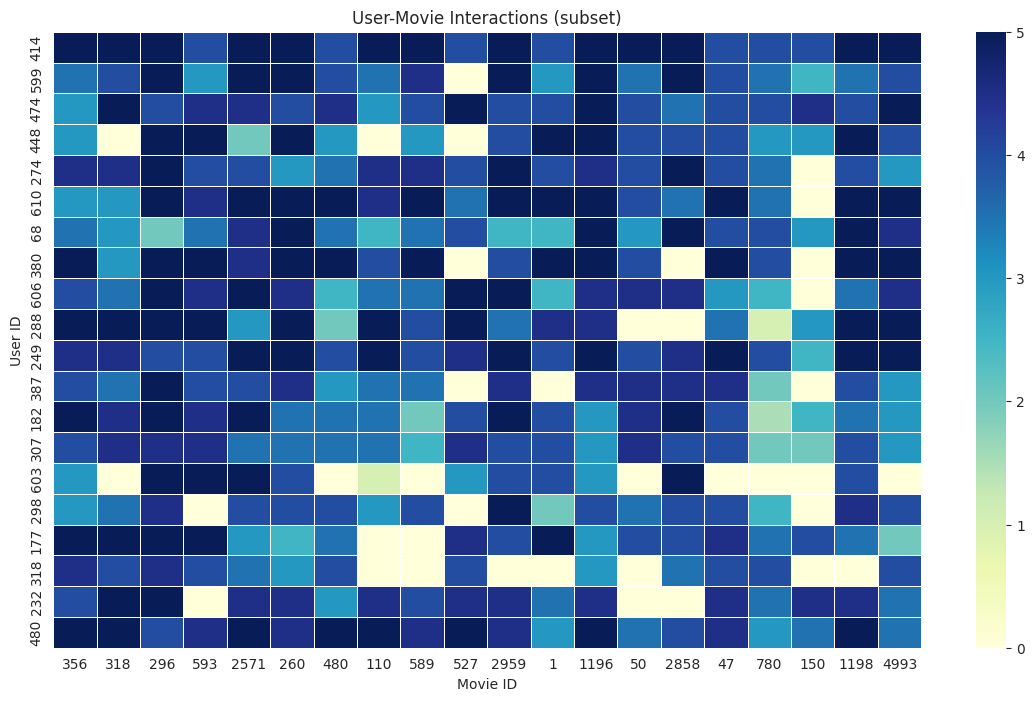

In [14]:
# Calculating the number of ratings given by each user
user_rating_counts = ratings_df.groupby('userId')['rating'].count()
# Calculating the number of ratings received by each movie
movie_rating_counts = ratings_df.groupby('movieId')['rating'].count()

# Creating a subset of the data for visualization
subset_users = user_rating_counts.sort_values(ascending=False).head(20).index
subset_movies = movie_rating_counts.sort_values(ascending=False).head(20).index

# Creating a user-movie interaction matrix for the subset
interaction_matrix_subset = ratings_df.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)
interaction_matrix_subset = interaction_matrix_subset.loc[subset_users, subset_movies]

# Plotting the heatmap
plt.figure(figsize=(14,8))
sns.heatmap(interaction_matrix_subset, cmap='YlGnBu', linewidths=.5)
plt.title('User-Movie Interactions (subset)')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()


## Amazon Dataset

In [19]:
amazon_df.head()

,item,user,rating,timestamp
0,0001527665,A3478QRKQDOPQ2,5.0,1362960000
1,0001527665,A2VHSG6TZHU1OB,5.0,1361145600
2,0001527665,A23EJWOW1TLENE,5.0,1358380800
3,0001527665,A1KM9FNEJ8Q171,5.0,1357776000
4,0001527665,A38LY2SSHVHRYB,4.0,1356480000


In [20]:
subset_data = amazon_df.iloc[:5000, :]  # Select the first 1000 rows
subset_data.to_csv('a.csv', index=False)  # Save to new CSV file